In [1]:
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.5.2 installed at /home/vibin/anaconda3/envs/camb/lib/python3.12/site-packages/camb


In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)

In [4]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [11]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 1.0, 2.0, 3.0, 4.0, 5.0, 6.0], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


Text(0.5, 0.98, 'Linear and non-linear power spectrum')

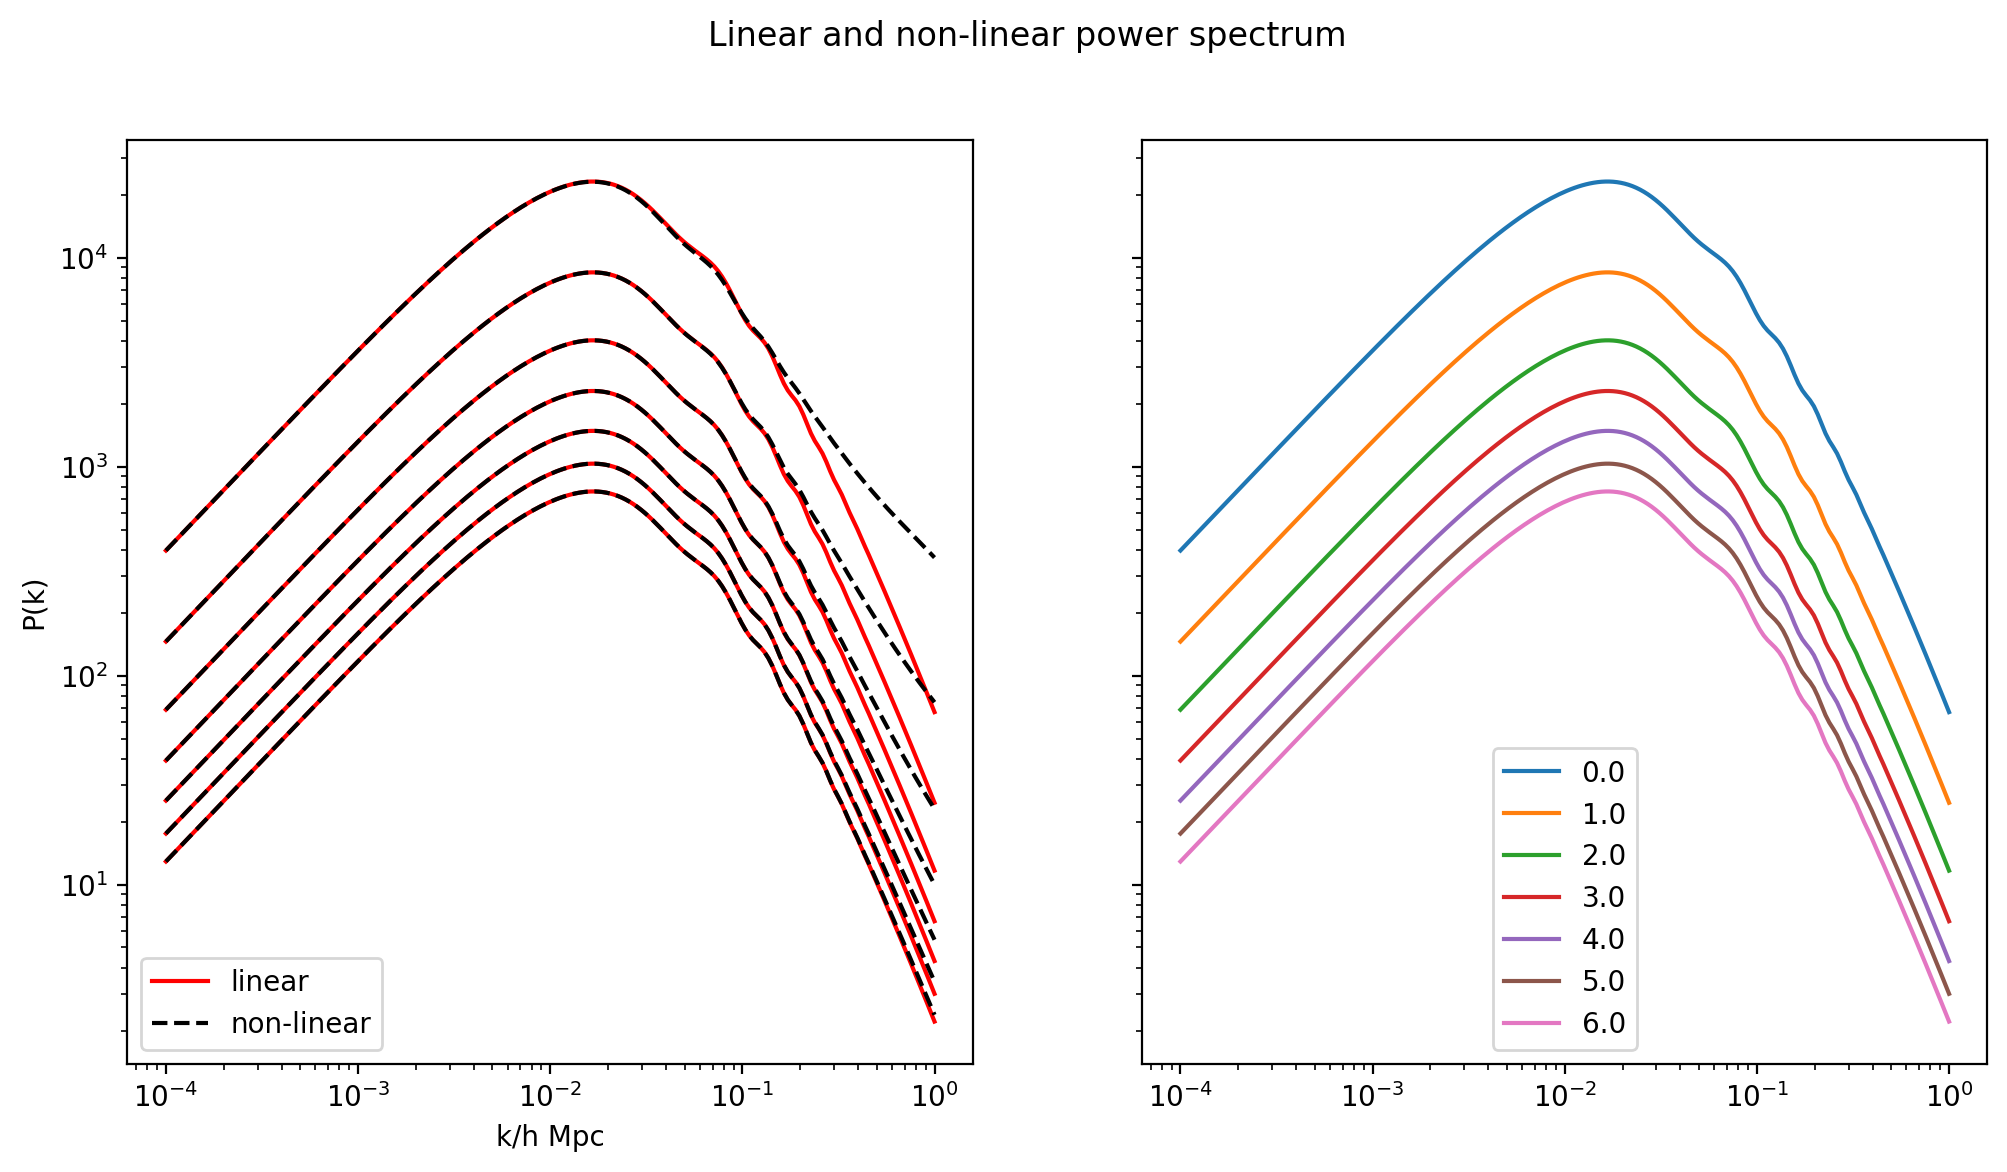

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,6))

for i, redshift in enumerate(z):
    ax1.loglog(kh, pk[i,:], color='red', ls='-')
    ax1.loglog(kh_nonlin, pk_nonlin[i,:], color='k', ls='--')
    ax2.loglog(kh, pk[i,:], ls='-', label=redshift)
ax1.set_xlabel('k/h Mpc');
ax1.set_ylabel('P(k)')
ax1.legend(['linear','non-linear'], loc='lower left');

ax2.legend()
plt.suptitle("Linear and non-linear power spectrum")